# [Chloride dynamics alter the input-output properties of neurons](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1007932)

[Currin CB](https://chriscurrin.com), Trevelyan AJ, Akerman CJ, Raimondo JV (2020) Chloride dynamics alter the input-output properties of neurons. PLOS Computational Biology 16(5): e1007932. https://doi.org/10.1371/journal.pcbi.1007932

> this notebook uses `clear_output` to keep only the figures in the cell output and remove HOC & Python output.

## imports and settings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, clear_output

from src.config import shared
from neuron import h
shared.INIT_NEURON(reinit=True)

# if you want to see all output (including HOC output, set this to False)
ONLY_SHOW_IMAGES = True
if not ONLY_SHOW_IMAGES:
    clear_output = lambda wait=None: 1

06-01 18:14:56 settings   [settings.py:  75] DEBUG    	 imported style C:\Users\Chris\dev\chloride-dynamics-io-neuron\src\config\article.mplstyle


	1 
	1 
	0 
******************************************************************************
                         'usefulFns.hoc' loaded!                              
******************************************************************************


06-01 18:14:56 shared     [shared.py :  58] INFO     	 celsius=37.0 and v_init=-65.0


# Figure 2

In [2]:
from src.traces import figure_cli_distribution, figure_cli_heatmaps, figure_v_traces
# options
_distal_balanced_synapses = [(200, 30), (220, 90), (230, 140), (240, 200), (250, 260), (250, 300), (260, 400),
                             (270, 500), (280, 600), (290, 700), (300, 800)]
_proximal_balanced_synapses = [(260, 30), (290, 60), (330, 90), (370, 120), (430, 150), (490, 180), (530, 210),
                               (600, 240), (660, 270), (720, 300), (780, 330)]
# chosen
distal_balanced_synapses = [(200, 30), (230, 140), (250, 300), (270, 500), (300, 800)]
proximal_balanced_synapses = [(260, 30), (290, 60), (330, 90), (490, 180), (780, 330)]
mid_d = len(distal_balanced_synapses)//2
mid_p = len(proximal_balanced_synapses)//2
distal = [distal_balanced_synapses[0], distal_balanced_synapses[mid_d], distal_balanced_synapses[-1]]
proximal = [proximal_balanced_synapses[0], proximal_balanced_synapses[mid_p], proximal_balanced_synapses[-1]]


## Shape plot for $[Cl^-]_i$ along neuron (Figure 2A, 2D)

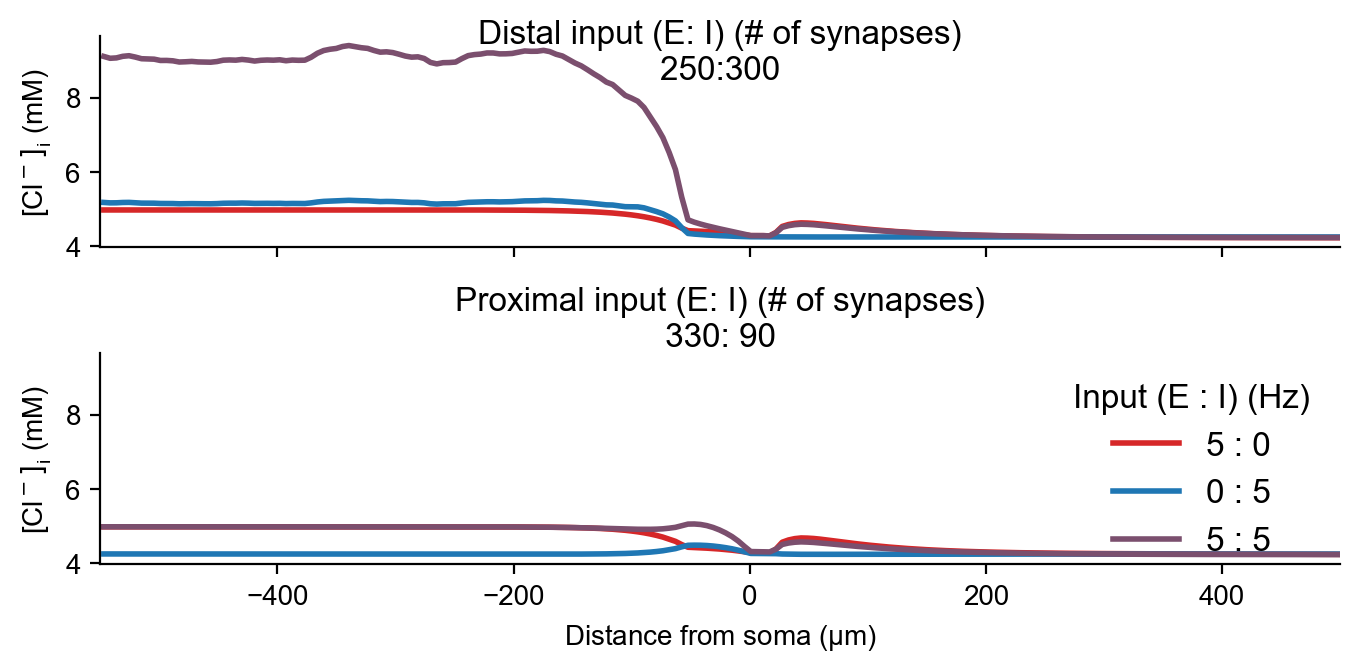

In [4]:
figure_cli_distribution(distal[1], proximal[1], savefig=True)
clear_output(wait=True)
plt.show()

## Heatmaps for output firing rate given 5 Hz balanced input (Figure 2B, 2E)
vary:
- number of $GABA_A$ synapses
- number of $NMDA+AMPA$ synapses

> if firing rate is above 15, skip further trials for this E:I combo and for larger E values (same I)




In [6]:
from src.balanced_heatmap import run_NEURON, run_analysis

In [7]:
# A geometric increase heatmap doesn't really work for a heatmap, which expects categorical data (pcolormesh is more suitable). 
geom_range = np.append(np.geomspace(10,100,2, dtype=int, endpoint=False), np.geomspace(100,1000,11, dtype=int))
# Use a consistent step for the heatmap.
exc_syn_list = inh_syn_list = np.arange(100, 600, 100) # narrow range
# default (from paper) is exc_syn_list = inh_syn_list = np.arange(0, 800 + 10, 10)
exc_syn_list

array([100, 200, 300, 400, 500])

In [8]:
result_files = run_NEURON(exc_syn_list=exc_syn_list, inh_syn_list=inh_syn_list, num_runs=1, max_num_runs=5)
clear_output()

06-01 18:07:36 balanced input heatmap [balanced_heatmap.py:  86] INFO     	 results_balanced_heatmap\distal_KCC2.txt
06-01 18:07:36 file_io    [file_io.py: 120] DEBUG    	 ei_strength={(1, 1): {(0, 0): (0.0, 0.0, 1.0), (10, 0): (0.0, 0.0, 1.0), (21, 0): (0.0, 0.0, 1.0), (46, 0): (0.0, 0.0, 1.0), (100, 0): (1.0, 0.0, 1.0), (125, 0): (1.0, 0.0, 1.0), (158, 0): (2.0, 0.0, 1.0), (199, 0): (4.0, 0.0, 1.0), (251, 0): (13.0, 0.0, 1.0), (316, 0): (30.0, 0.0, 1.0), (398, 0): (16.0, 0.0, 0.0), (501, 0): (16.0, 0.0, 0.0), (630, 0): (16.0, 0.0, 0.0), (794, 0): (16.0, 0.0, 0.0), (1000, 0): (16.0, 0.0, 0.0), (0, 10): (0.0, 0.0, 1.0), (10, 10): (0.0, 0.0, 1.0), (21, 10): (0.0, 0.0, 1.0), (46, 10): (0.0, 0.0, 1.0), (100, 10): (1.0, 0.0, 1.0), (125, 10): (1.0, 0.0, 1.0), (158, 10): (2.0, 0.0, 1.0), (199, 10): (4.0, 0.0, 1.0), (251, 10): (12.0, 0.0, 1.0), (316, 10): (29.0, 0.0, 1.0), (398, 10): (16.0, 0.0, 0.0), (501, 10): (16.0, 0.0, 0.0), (630, 10): (16.0, 0.0, 0.0), (794, 10): (16.0, 0.0, 0.0), (1000

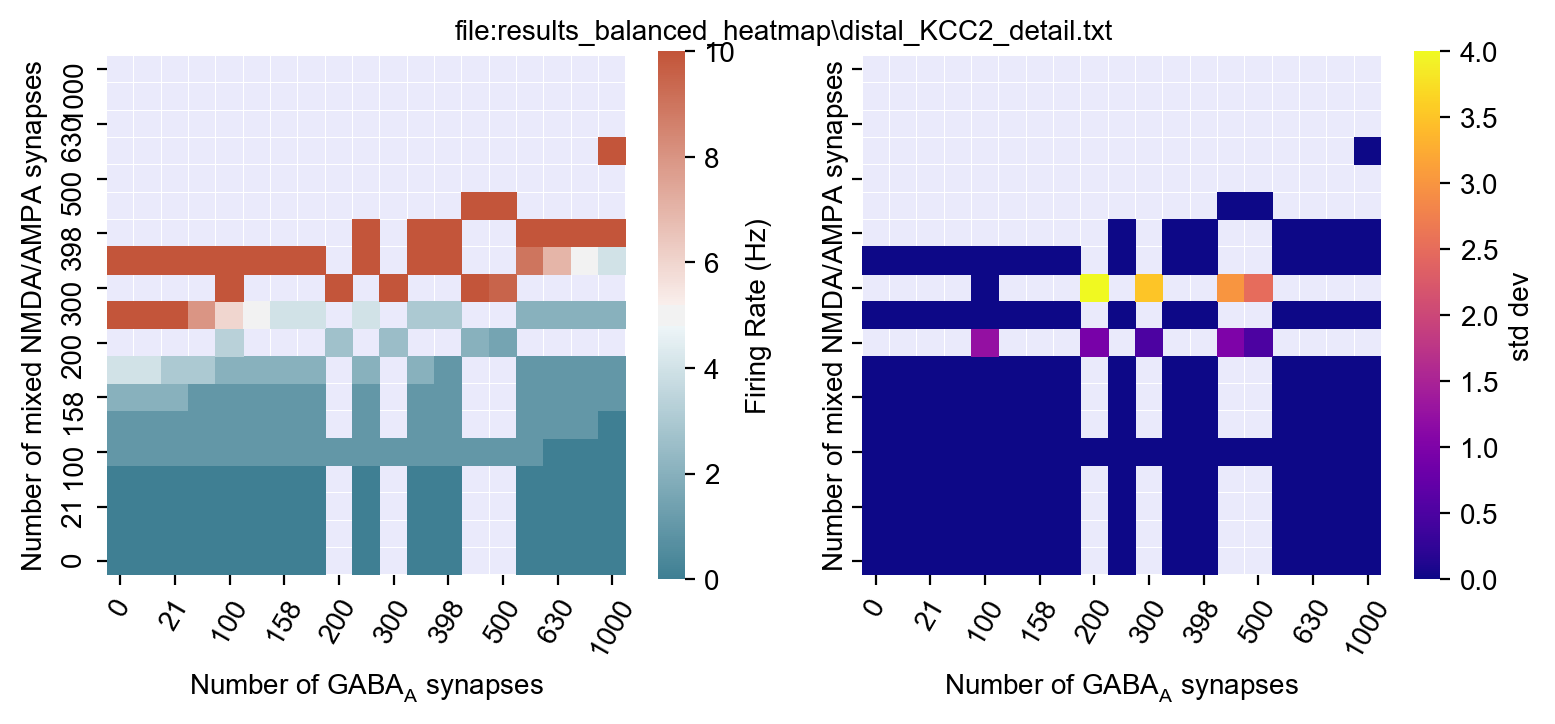

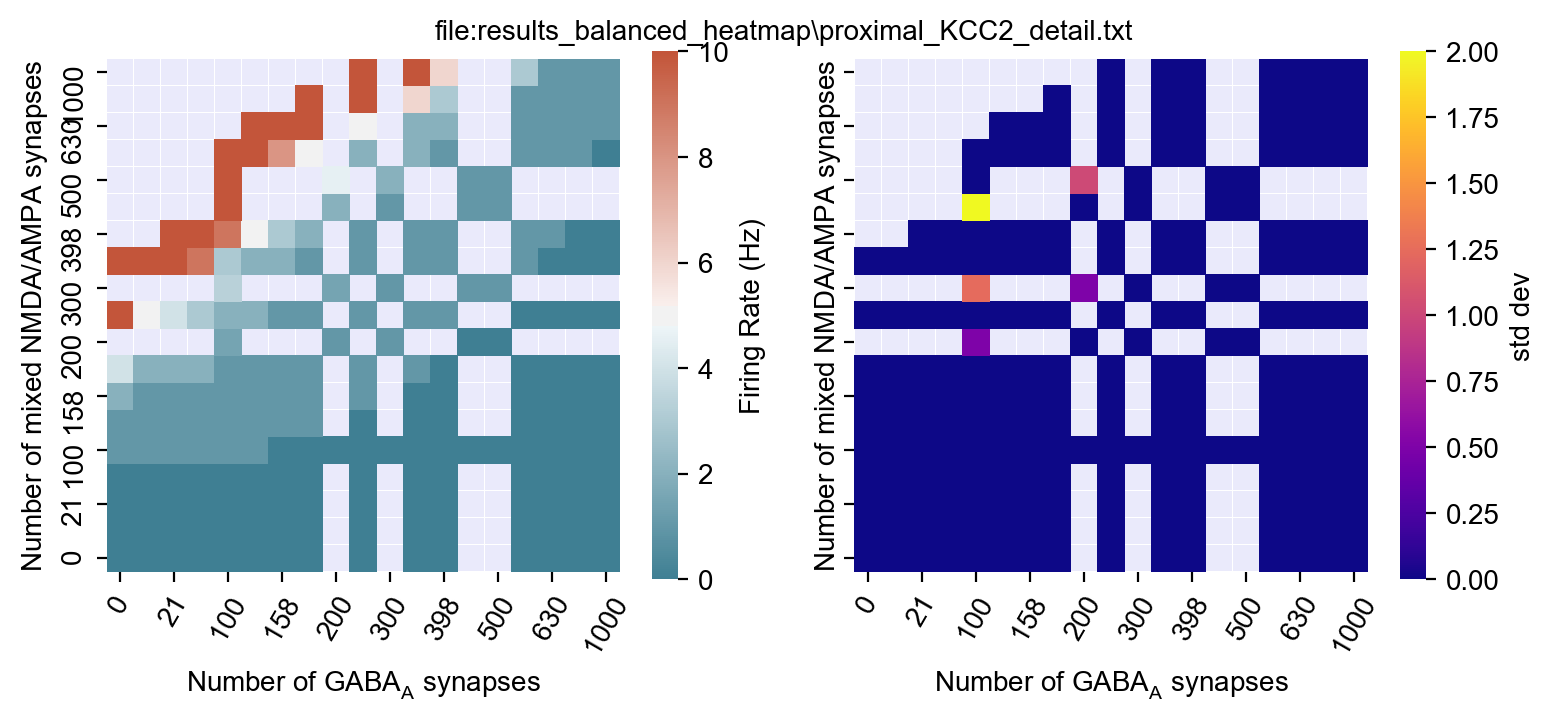

In [9]:
run_analysis(result_files)
clear_output(wait=True)
plt.show()

## Heatmaps for $[Cl^-]_i$ at different input frequencies (Figure 2C, 2F)

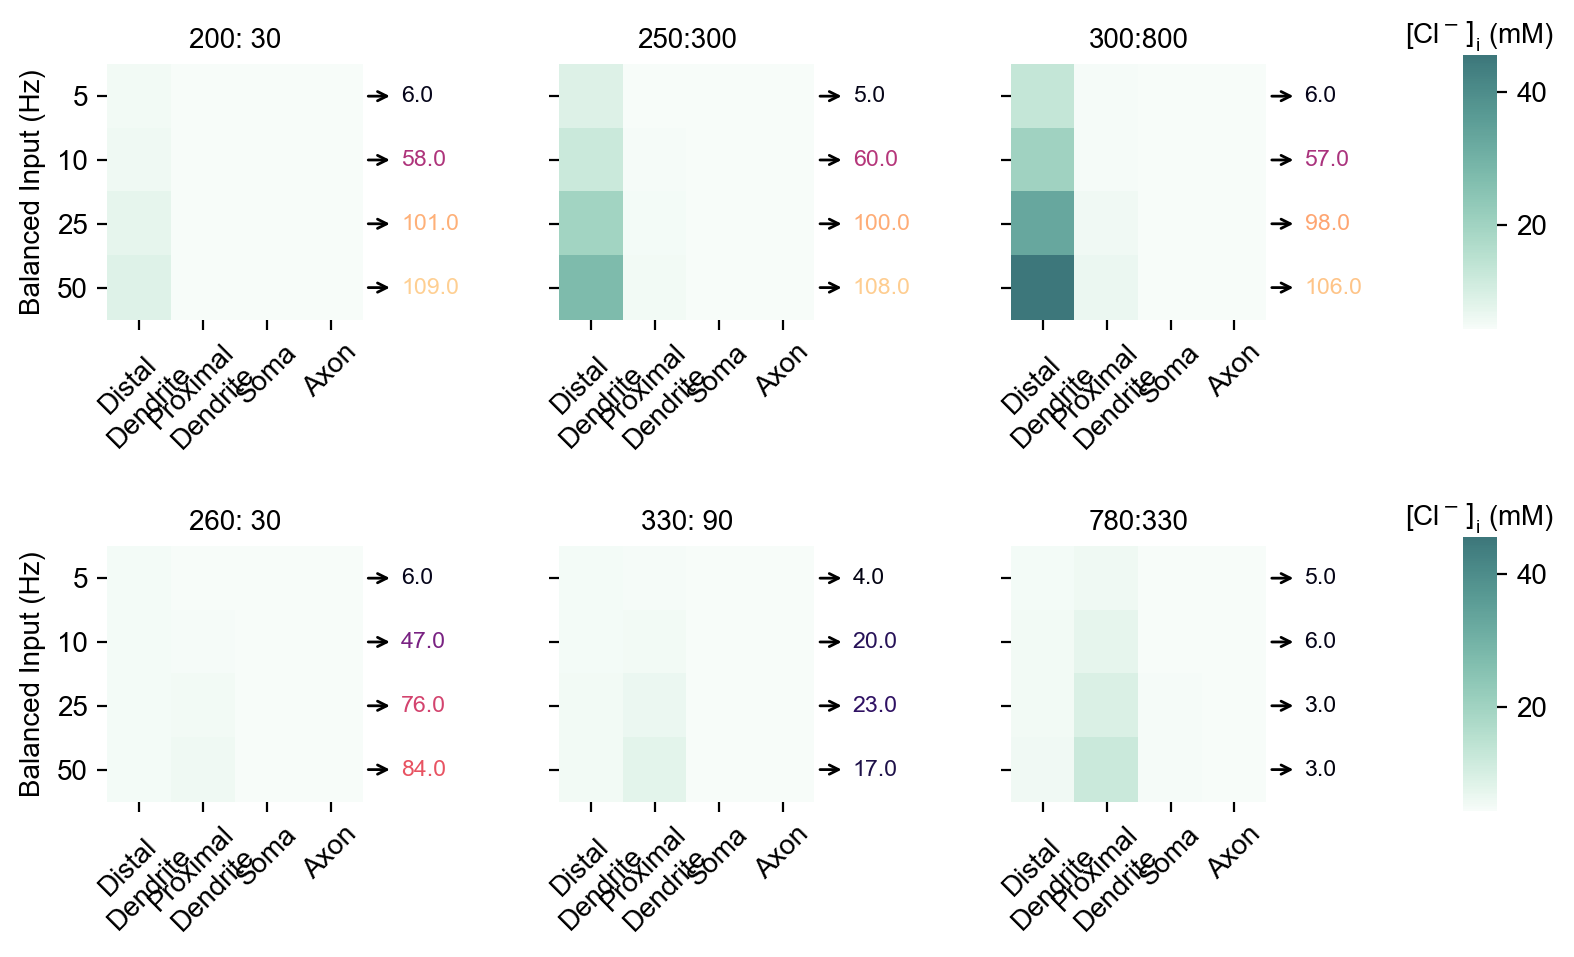

In [13]:
figure_cli_heatmaps(distal, proximal, show_fr=True, savefig=True)
clear_output(wait=True)
plt.show()

### Voltage traces for 5 Hz balanced input (Dynamic $Cl^-$)

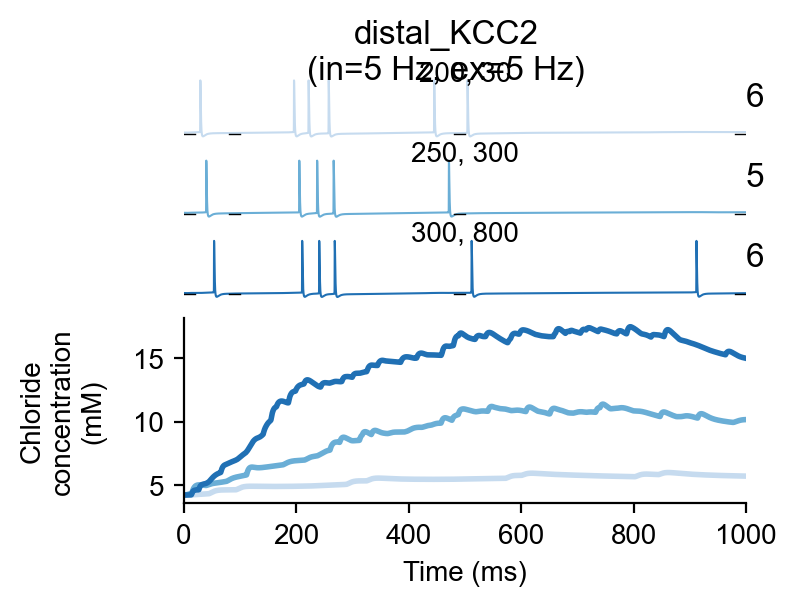

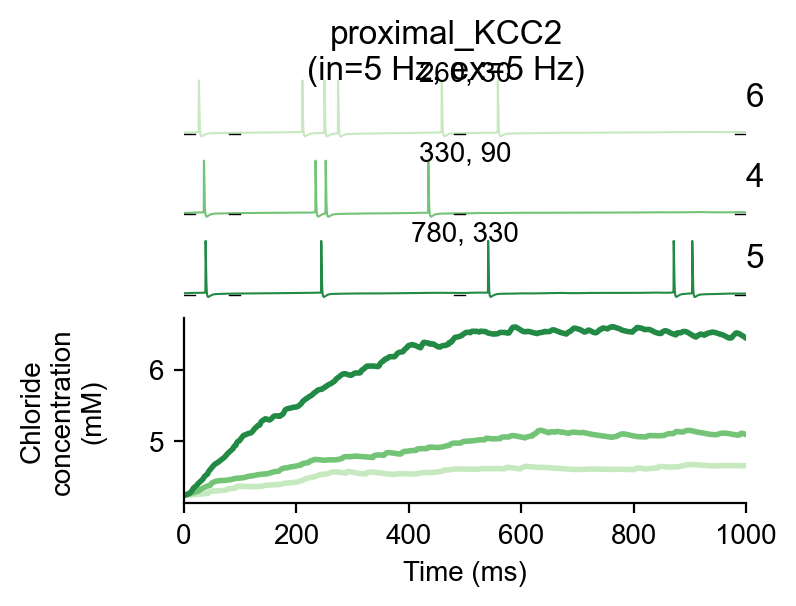

In [15]:
hz = {'in': 5, 'ex': 5}
figure_v_traces(inh_region="distal", KCC2=True, synapse_numbers=distal, 
                hz=hz, show_cli=True)
figure_v_traces(inh_region="proximal", KCC2=True, synapse_numbers=proximal, 
                hz=hz, show_cli=True)
clear_output(wait=True)
plt.show()

# Figure 3 

## Figure 3 voltage traces

### Voltage traces for 20 Hz balanced input (Dynamic $Cl^-$)

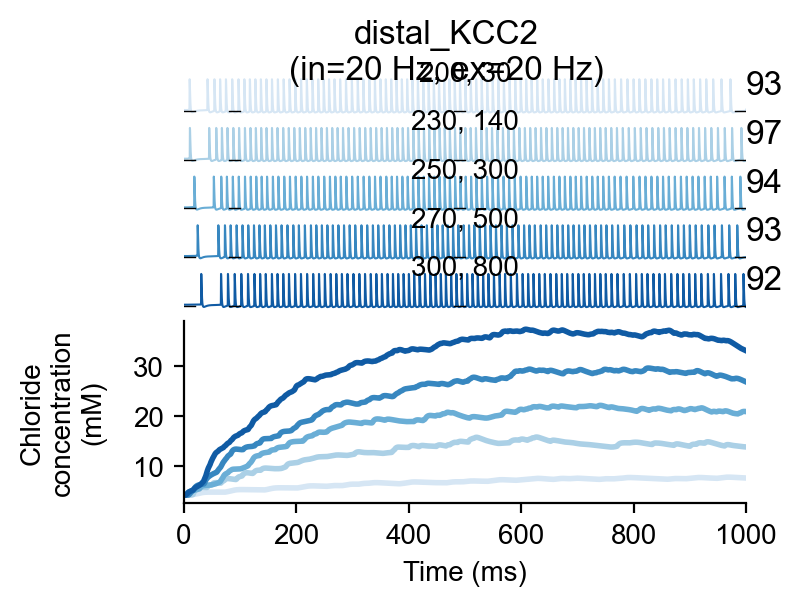

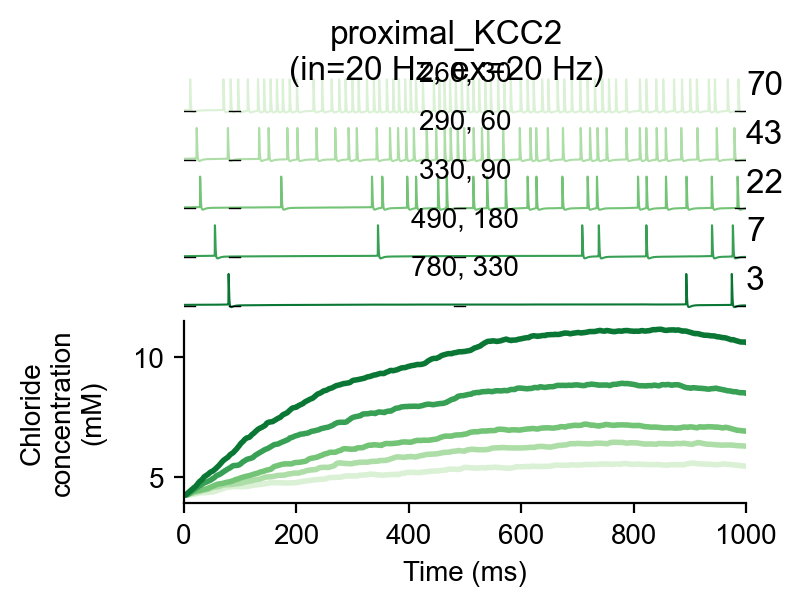

In [16]:
from neuron import h
figure_v_traces(inh_region="distal", synapse_numbers=distal_balanced_synapses,
                hz={'in': 20, 'ex': 20}, show_cli=True)
figure_v_traces(inh_region="proximal", synapse_numbers=proximal_balanced_synapses,
                hz={'in': 20, 'ex': 20}, show_cli=True)
clear_output(wait=True)
plt.show()

### Voltage traces for 20 Hz balanced input (Static $Cl^-$)

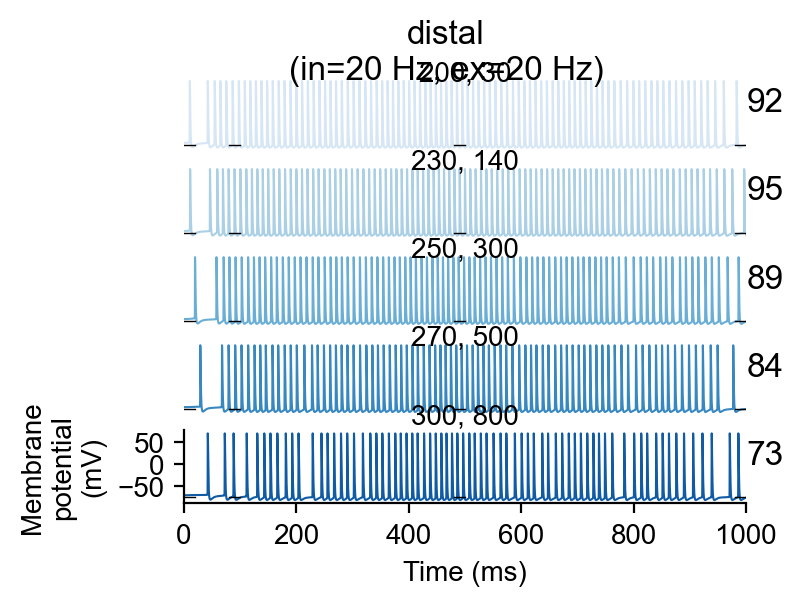

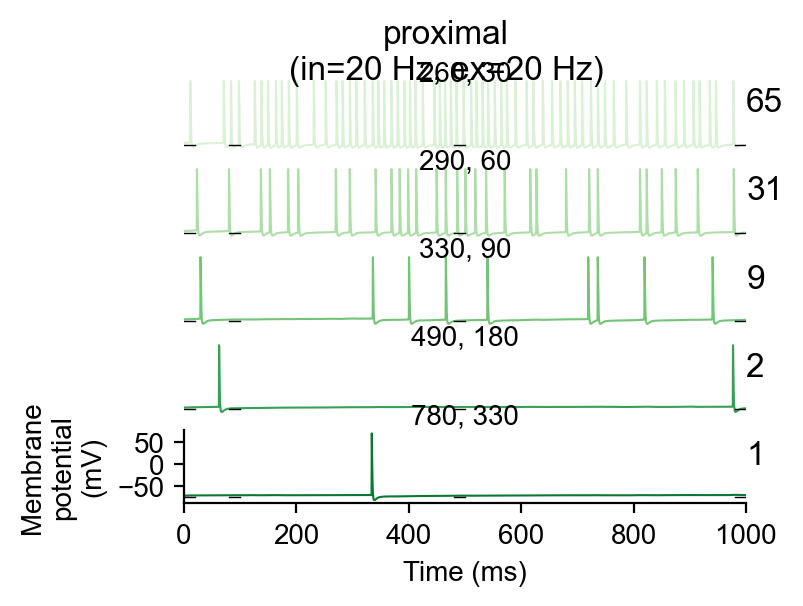

In [17]:
# examples for static chloride
figure_v_traces(inh_region="distal", KCC2=False, synapse_numbers=distal_balanced_synapses,
                hz={'in': 20, 'ex': 20})
figure_v_traces(inh_region="proximal", KCC2=False, synapse_numbers=proximal_balanced_synapses,
                hz={'in': 20, 'ex': 20})
clear_output(wait=True)
plt.show()

# Figure 5

Simulations are run for 10000 ms (sim time)

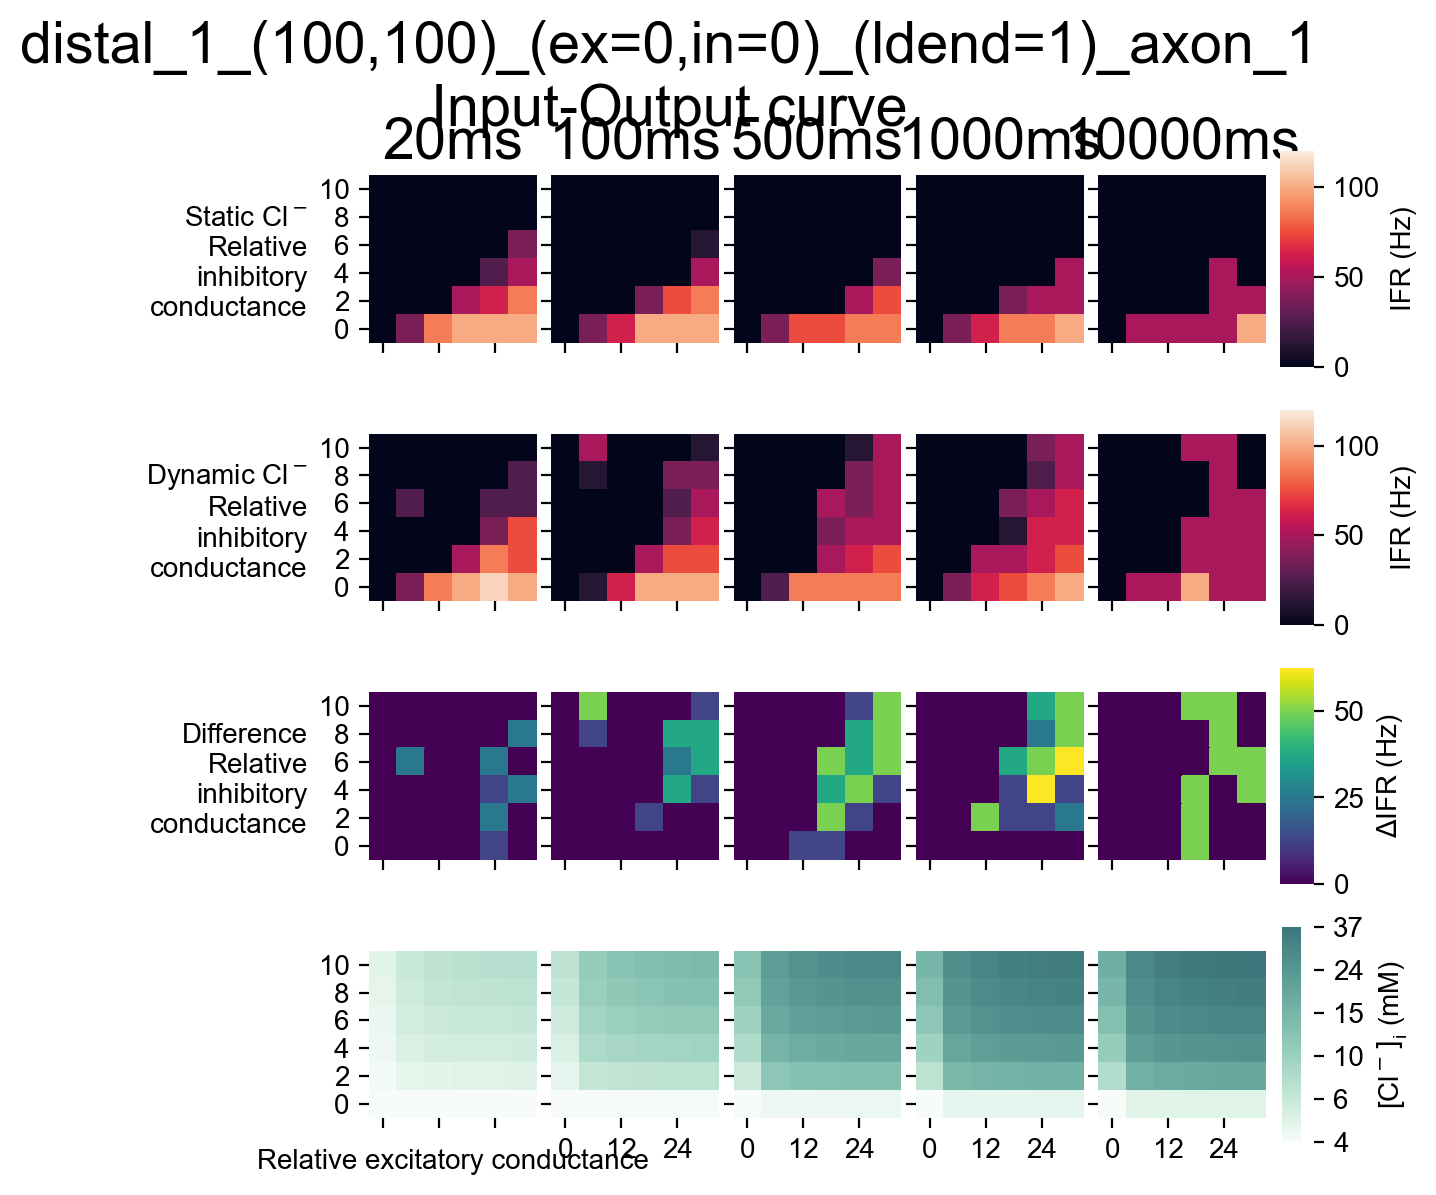

In [2]:
from src.io_time_heatmap import iotime

ifr_windowsize = 0.02  # in seconds
time_points = [int(ifr_windowsize*1000), 100, 500, 1000, 10000]
iotime(file_name="distal",
       time_points=time_points,
       ifr_windowsize=ifr_windowsize,
       synapse_type=1,  # 1 for persistent
       synapse_numbers=(100, 100),
       exc_input=np.arange(0, 31, 6), # np.arange(0, 33, 3)
       inh_input=np.arange(0, 11, 2), # np.arange(0, 22, 2)
       diam={'ldend': 1}, 
       trials=1, # 5
       save=True)
clear_output(wait=True)
plt.show()

# Figure 3, 4, & 6 were done as follows:
1. run `python src/protocols.py <argument> <protocol>...`
    
    where `<argument>` is one of
    - `balanced` **for Figure 3**
    
    - `synapses` **for Figure 4**
    
    - `persistence` **for Figure 6A** 
        
        if `<protocol>` is provided, it can be any of
        - `pkcc2_homo` - **Figure 6D**
        - `duration` - **Figure 6D**
        - `dynamic_K` - **Figure 6D**
        - `pas` - **Figure 6D**
        - `diam`    - **Figure 6C**
        - `pkcc2`   - **Figure 6B**
        - `pcl` - *from earlier version - untested*
        - `cli` - *from earlier version - untested*
        
    
1. analysis using `ioAnalysis.m` (sorry)
    
    see `ioAnalysis` function for more details
    
**Figure 3A & B** input-output curves can also be plotted using python with the `balanced_iocurves.py` file